**Imports and workspace setting**

In [140]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

**Loading crime-data and preview**

In [251]:
crime_data = pd.read_csv('../data/Crime_data_2012.csv')

crime_data = crime_data.T

column_names = crime_data.iloc[0]
columns = column_names.tolist()
crime_data.columns = columns

crime_data = crime_data.iloc[1:]
crime_data = crime_data.sort_index()

crime_data.to_csv('out.csv')
crime_data = pd.read_csv('out.csv')
crime_data.rename(columns={'Unnamed: 0':'District'},inplace=True)
#crime_data.set_index("District",drop=True,inplace=True)

print("Data set size : ", crime_data.shape)

crime_data.head()

Data set size :  (25, 23)


,District,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,...,Extortion,"Cheating/Misappropriation C.B. Trust over Rs.100,000/=",Theft of Property including praedial produce over Rs. 5000/ & cycle cattle theft irrrespective of their value,Counterfeiting Currency,Offences against State,Cruelty to Children & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possession of Automatic or Repeater Shot Guns,"Offences under the Poisons, Opium & Dangerous Drugs Ord. Quantity as indicated in Circular NO. 1540/2000"
0,Ampara,29,31,36,239,69,38,16,12,37,...,2,232,242,1,0,1,2,1,0,1
1,Anuradhapura,68,47,107,834,108,72,24,15,199,...,9,270,584,6,0,23,2,4,1,7
2,Badulla,38,14,42,359,112,85,28,11,73,...,1,138,296,1,0,2,0,3,0,20
3,Batticaloa,21,33,38,227,56,89,11,2,52,...,4,225,221,1,0,6,3,1,1,3
4,Colombo,154,22,140,2996,248,379,62,21,120,...,37,1736,2809,4,0,52,1,21,6,573


**Loading Employment by Industrical sector** 

In [252]:
emplyment_data = pd.read_csv('../data/Employees by industrial sector (% to total employment).csv')

emplyment_data = emplyment_data.sort_values(by = ['District'])
emplyment_data = emplyment_data.reset_index(drop=True)
## Rename column with a better name
emplyment_data.rename(columns={'Total':'Total Male Employment'}, inplace=True)
## Drop provice column
emplyment_data = emplyment_data.drop('Province', 1)

emplyment_data.head()

,District,Male emp. Agriculture,Male emp. Industry,Male emp. Services,Total Male Employment,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total employment
0,Ampara,13.8,19.0,26.9,59.7,1.8,4.1,44.7,50.6,11.3,15.9,30.6,57.8
1,Anuradhapura,3.7,6.0,27.0,36.7,1.7,5.5,18.0,25.2,2.9,5.8,23.5,32.2
2,Badulla,17.0,9.9,21.5,48.4,23.7,4.8,17.3,45.8,19.6,7.9,19.9,47.4
3,Batticaloa,20.9,18.1,26.0,64.9,2.1,4.0,33.2,39.3,16.6,14.8,27.6,59.0
4,Colombo,1.1,20.6,42.9,64.7,1.3,20.0,50.5,71.7,1.2,20.4,45.4,67.0


Data set size =  (25, 13)
Dimension =  2


Text(0.5, 1.0, 'Male-Female Employment')

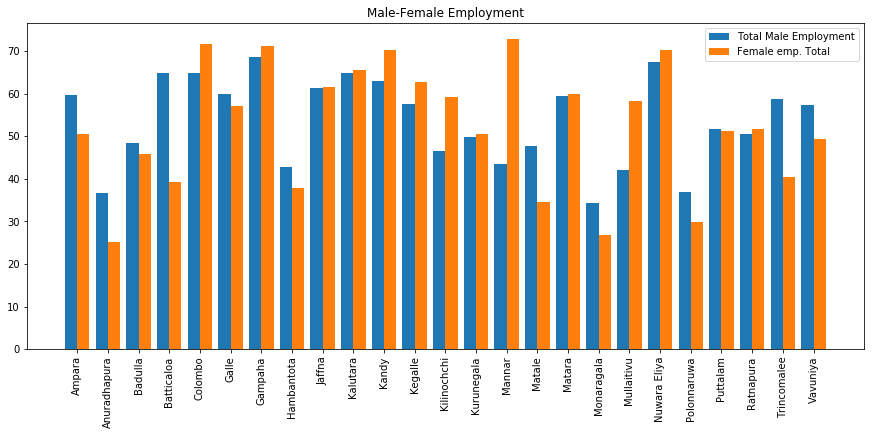

In [253]:
print('Data set size = ', emplyment_data.shape)
print('Dimension = ', emplyment_data.ndim)
#emplyment_data.iloc[:,[5,13]].plot.bar(figsize=(15, 10))

#plot data
ind = np.arange(25)    # the x locations for the groups
width = 0.4   
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(ind, emplyment_data['Total Male Employment'],width=0.4)
ax.bar(ind+width, emplyment_data['Female emp. Total'],width=0.4)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(emplyment_data.District.tolist(),rotation='vertical')
ax.legend(['Total Male Employment','Female emp. Total'])
ax.set_title('Male-Female Employment')

**Loading Accomadation for tourist data**

In [254]:
hotels_data = pd.read_csv('../data/Information for Accommodation.csv')

## Drop uninterested columns
hotels_data = hotels_data.drop('Address', 1)
hotels_data = hotels_data.drop('AGA Division', 1)
hotels_data = hotels_data.drop('PS/MC/UC', 1)

hotels_data = hotels_data.sort_values(by = ['District'])
hotels_data.head()

,Type,Name,Rooms,Grade,District,Logitiute,Latitude
1694,Home Stay Units,SAJANI'S HOME,1,STANDARD,Ampara,NaN,NaN
1180,Guest Houses,SEA BREEZE RESTAURANT & GUEST INN,7,C,Ampara,81.840089,7.408089
1688,Home Stay Units,THARAKA SURF GUEST,5,STANDARD,Ampara,NaN,NaN
1689,Home Stay Units,WELCOME HOUSE,1,STANDARD,Ampara,81.808772,6.758059
1690,Home Stay Units,PANAMA VILLAGE HOME,4,STANDARD,Ampara,NaN,NaN


In [255]:
print('Data set size = ', hotels_data.shape)
print('Number districts = ', len(hotels_data.District.unique()))

Data set size =  (2130, 7)
Number districts =  25


**Drill Down accommodation data by district using groupby feature**

We count number of rooms available tourist rooms in each district to measure to popularity of tourism in the island district-wise

In [256]:
room_count_by_district = pd.core.frame.DataFrame({'RoomCount' : hotels_data.groupby( [ "District"] ).size()}).reset_index()
room_count_by_district.sort_values(by = ['District'])
room_count_by_district.head()

,District,RoomCount
0,Ampara,62
1,Anuradhapura,58
2,Badulla,116
3,Batticaloa,44
4,Colombo,297


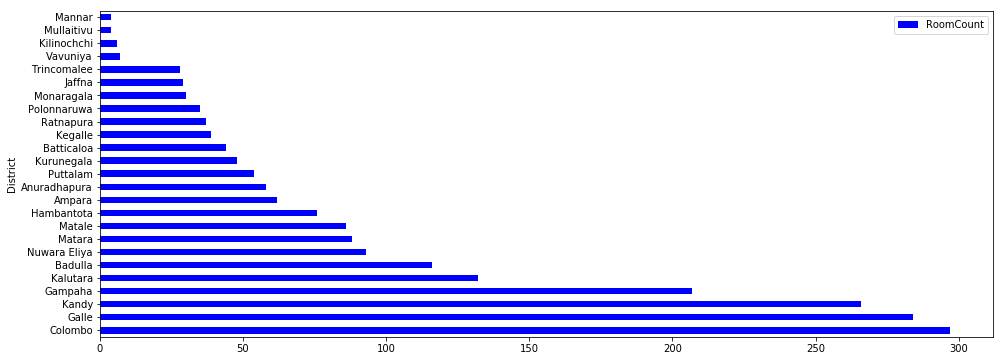

In [257]:
copy_To_Plot = room_count_by_district.set_index('District')
copy_To_Plot.sort_values(by = ['RoomCount'], inplace=True, ascending=False)

copy_To_Plot.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

**Merge all 4 datasets in to one pandas frame**

In [258]:
## Check equlaity of District names in all 3 datasets
print('Crime_data districts = ', len(crime_data.District.unique()))
print('Employment_data districts = ', len(emplyment_data.District.unique()))
print('Tourism_data districts = ', len(room_count_by_district.District.unique()))

Crime_data districts =  25
Employment_data districts =  25
Tourism_data districts =  25


In [259]:
result = pd.merge(room_count_by_district, emplyment_data, on='District', how='outer')
result = pd.merge(result, crime_data, on='District', how='outer')

print ('Integrated dataframe shape = ', result.shape)
result.head(50)

Integrated dataframe shape =  (25, 36)


,District,RoomCount,Male emp. Agriculture,Male emp. Industry,Male emp. Services,Total Male Employment,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,...,Extortion,"Cheating/Misappropriation C.B. Trust over Rs.100,000/=",Theft of Property including praedial produce over Rs. 5000/ & cycle cattle theft irrrespective of their value,Counterfeiting Currency,Offences against State,Cruelty to Children & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possession of Automatic or Repeater Shot Guns,"Offences under the Poisons, Opium & Dangerous Drugs Ord. Quantity as indicated in Circular NO. 1540/2000"
0,Ampara,62,13.8,19.0,26.9,59.7,1.8,4.1,44.7,50.6,...,2,232,242,1,0,1,2,1,0,1
1,Anuradhapura,58,3.7,6.0,27.0,36.7,1.7,5.5,18.0,25.2,...,9,270,584,6,0,23,2,4,1,7
2,Badulla,116,17.0,9.9,21.5,48.4,23.7,4.8,17.3,45.8,...,1,138,296,1,0,2,0,3,0,20
3,Batticaloa,44,20.9,18.1,26.0,64.9,2.1,4.0,33.2,39.3,...,4,225,221,1,0,6,3,1,1,3
4,Colombo,297,1.1,20.6,42.9,64.7,1.3,20.0,50.5,71.7,...,37,1736,2809,4,0,52,1,21,6,573
5,Galle,284,15.2,21.1,23.7,60.0,14.8,17.6,24.7,57.1,...,4,249,363,3,0,4,3,26,2,65
6,Gampaha,207,3.3,31.4,33.7,68.5,1.0,34.5,35.7,71.2,...,33,1266,1910,9,0,67,2,26,3,75
7,Hambantota,76,9.4,14.6,18.9,42.8,3.1,13.1,21.7,37.9,...,2,218,274,1,0,1,0,8,2,56
8,Jaffna,29,8.1,22.6,30.7,61.3,10.8,7.3,43.4,61.5,...,0,211,191,0,1,9,1,2,0,3
9,Kalutara,132,5.3,23.8,35.6,64.7,11.0,19.4,35.2,65.6,...,4,301,725,0,0,41,0,4,0,83


**Correlation analysis**

Text(0.5, 1.0, 'Commit to Suicide Correlation')

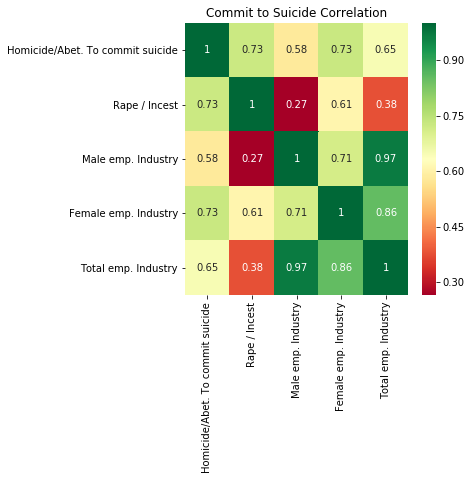

In [260]:
result_suicide_against_emp = pd.concat([crime_data.iloc[:,[7,9]], emplyment_data.iloc[:,2:]], axis=1)

corrValues = result_suicide_against_emp.corr(method='pearson')
topCorrFeatures = corrValues.index[abs(corrValues['Homicide/Abet. To commit suicide']) >= 0.4]

plt.figure(figsize=(5,5))
ax = sns.heatmap(result_suicide_against_emp[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")
ax.set_title('Commit to Suicide Correlation')

Text(0, 0.5, 'Female Industry Emp')

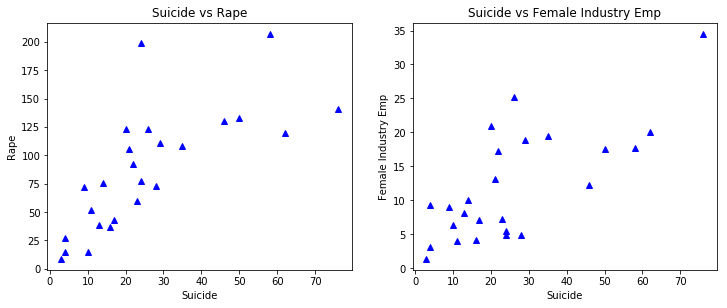

In [261]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.plot(result_suicide_against_emp['Homicide/Abet. To commit suicide'], result_suicide_against_emp['Rape / Incest'], 'b^')
plt.title('Suicide vs Rape')
plt.xlabel("Suicide")
plt.ylabel("Rape")

plt.subplot(2,2,2)
plt.plot(result_suicide_against_emp['Homicide/Abet. To commit suicide'], result_suicide_against_emp['Female emp. Industry'], 'b^')
plt.title('Suicide vs Female Industry Emp')
plt.xlabel("Suicide")
plt.ylabel("Female Industry Emp")

Text(0.5, 1.0, 'Theft Correlation')

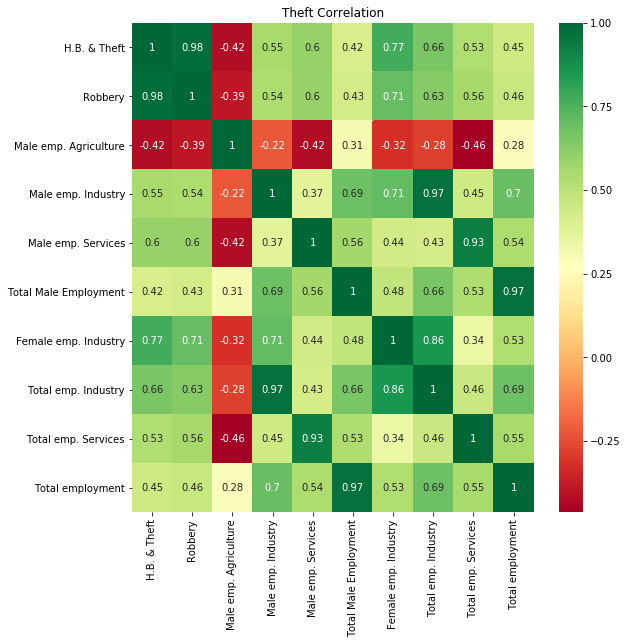

In [262]:
result_roberry_against_emp = pd.concat([crime_data.iloc[:,[4,11]], emplyment_data.iloc[:,1:]], axis=1)
result_roberry_against_emp.head()

corrValues = result_roberry_against_emp.corr(method='pearson')
topCorrFeatures = corrValues.index[abs(corrValues['H.B. & Theft']) >= 0.4]

plt.figure(figsize=(9,9))
ax = sns.heatmap(result_roberry_against_emp[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")
ax.set_title('Theft Correlation')

Text(0, 0.5, 'Total emp. Industry')

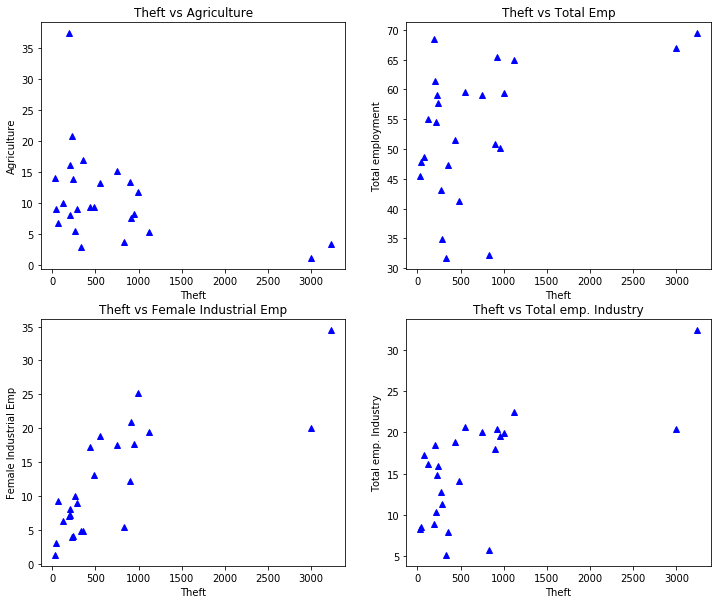

In [263]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.plot(result_roberry_against_emp['H.B. & Theft'], result_roberry_against_emp['Male emp. Agriculture'], 'b^')
plt.title('Theft vs Agriculture')
plt.xlabel("Theft")
plt.ylabel("Agriculture")

plt.subplot(2,2,2)
plt.plot(result_roberry_against_emp['H.B. & Theft'], result_roberry_against_emp['Total employment'], 'b^')
plt.title('Theft vs Total Emp')
plt.xlabel("Theft")
plt.ylabel("Total employment")

plt.subplot(2,2,3)
plt.plot(result_roberry_against_emp['H.B. & Theft'], result_roberry_against_emp['Female emp. Industry'], 'b^')
plt.title('Theft vs Female Industrial Emp')
plt.xlabel("Theft")
plt.ylabel("Female Industrial Emp")

plt.subplot(2,2,4)
plt.plot(result_roberry_against_emp['H.B. & Theft'], result_roberry_against_emp['Total emp. Industry'], 'b^')
plt.title('Theft vs Total emp. Industry')
plt.xlabel("Theft")
plt.ylabel("Total emp. Industry")

**Stating independent/ dependent variables**

**Divide training and testing data-set**

In [15]:
## 20 districts for training
## 6 for training
## Or some other experimenting methods would be okay.

**Model training - possibly regression/ classification**

In [17]:
## If it is classification we need to pick a label column.

**Testing the model**

# ****@TODO (update this section if completed)****

1. Most graphs above plotted X-Y axis without considering the independent and dependent variables. Swap X-Y axis.

2. Merge 2 correlation graphs into one.

3. Resize graphs so that it is easy to read

4. We can use this notebook only to visualize data and obtain hypothesis. Use different notebooks to predict/ proofs by saving this notebooks integrated dataset.

5. Add geographical plots.